### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import LassoLars, BayesianRidge
from sklearn.svm import SVC, SVR

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
data = pd.read_csv("dataset/startup_funding.csv")

### Analysing the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [4]:
data.shape

(3044, 10)

- **Dataset has some nan values in some of the features.**
- **Dataset consists of 3044 records and 10 features.**

In [5]:
data.isna().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [6]:
data.head(2) # Sample data with 2 records will be shown

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


- **Remark feature in dataset has large number of nan values. So, we will remove this feature.**
- **And also we are removing the features "Sr No", "Date" and "Startup Name" features because this features will not help model to understand any feature.**

### Removing unneccesary features

In [7]:
data.drop(["Sr No", "Date dd/mm/yyyy", "Startup Name", "Remarks"], axis=1, inplace=True)

In [8]:
data.shape

(3044, 6)

- **We can see that the features in the data is reduced to 6.**

- **We have nan values in the target variable. So, we will remove the records with nan in target variable.**

In [9]:
data=data.dropna(subset=['Amount in USD'])

In [10]:
data.shape

(2084, 6)

In [11]:
data['Amount in USD'] = data['Amount in USD'].apply(lambda x: str(x.replace(',', '')))
inds = []
for i, j in data.iterrows():
    try:
        value = str(j['Amount in USD'])
        amount = float(value)
        data.loc[i, 'Amount in USD'] = amount
    except:
        inds.append(i)
        

In [12]:
data.drop(inds, axis=0, inplace=True)
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)
data['Amount in USD'] = data['Amount in USD'].apply(lambda x: float(x))

In [13]:
data.shape

(2065, 6)

In [14]:
data.head(2)

,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Industry Vertical  1934 non-null   object 
 1   SubVertical        1418 non-null   object 
 2   City  Location     1930 non-null   object 
 3   Investors Name     2045 non-null   object 
 4   InvestmentnType    2062 non-null   object 
 5   Amount in USD      2065 non-null   float64
dtypes: float64(1), object(5)
memory usage: 96.9+ KB


- **Now we can see that the target variable is converted into float type.**

In [16]:
# Lets replace all the features with object type using mode
data['Industry Vertical']=data['Industry Vertical'].fillna(data['Industry Vertical'].mode()[0])
data['SubVertical']=data['SubVertical'].fillna(data['SubVertical'].mode()[0])
data['City  Location']=data['City  Location'].fillna(data['City  Location'].mode()[0])
data['Investors Name']=data['Investors Name'].fillna(data['Investors Name'].mode()[0])
data['InvestmentnType']=data['InvestmentnType'].fillna(data['InvestmentnType'].mode()[0])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Industry Vertical  2065 non-null   object 
 1   SubVertical        2065 non-null   object 
 2   City  Location     2065 non-null   object 
 3   Investors Name     2065 non-null   object 
 4   InvestmentnType    2065 non-null   object 
 5   Amount in USD      2065 non-null   float64
dtypes: float64(1), object(5)
memory usage: 96.9+ KB


- **All nan values in the data is removed and modified with suitable values.**

In [18]:
categorical_features=data.select_dtypes(include=[np.object])
float_features=data.select_dtypes(include=[np.float])

In [19]:
for c in categorical_features:
    le = LabelEncoder() 
    data[c] = le.fit_transform(list(data[c].values))

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Industry Vertical  2065 non-null   int64  
 1   SubVertical        2065 non-null   int64  
 2   City  Location     2065 non-null   int64  
 3   Investors Name     2065 non-null   int64  
 4   InvestmentnType    2065 non-null   int64  
 5   Amount in USD      2065 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 96.9 KB


- **Now we can see that all values in data is converted into int values.**

### Lets visualise some data

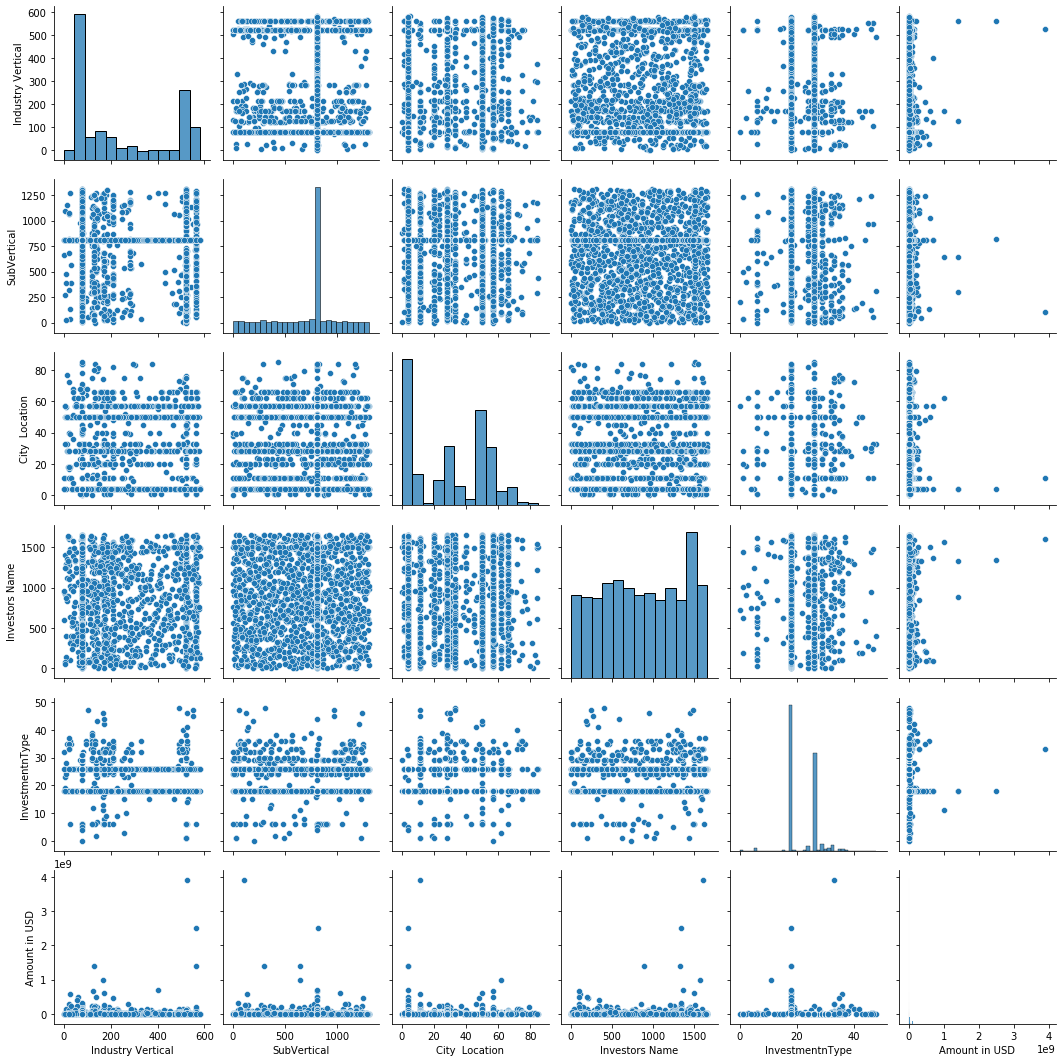

In [21]:
sns.pairplot(data)

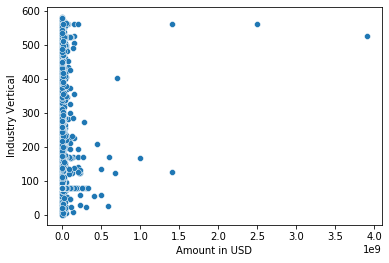

In [22]:
sns.scatterplot(x="Amount in USD", y= "Industry Vertical", data=data)

### Spliting the data

In [23]:
target = "Amount in USD"
features = [i for i in data.columns if i!=target]

In [24]:
# Splitting the dataset into train and test set with 80% in train and 20% in test to validate the model
train, test = train_test_split(data, test_size = 0.2, shuffle=True, random_state=42)

print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {test.shape}') # getting test data shape

Shape of train dataset : (1652, 6)
Shape of train dataset : (413, 6)


In [25]:
train_X = train[features]# taking the training data features
train_y=train[target]# output of our training data
test_X= test[features] # taking test data features
test_y =test[target]   #output value of test data

### Lets define the error method


In [26]:
 # Provides the root mean square error value for the predictions and ground truths.
def rmse_(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

## Training

In [27]:
model = LinearRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
rmse = rmse_(test_y, prediction)
print(f'Root Mean Square error for the Linear regression model : {rmse}')

model = SVR()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
rmse = rmse_(test_y, prediction)
print(f'Root Mean Square error for the Support Vector regression model : {rmse}')

model = SGDRegressor()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
rmse = rmse_(test_y, prediction)
print(f'Root Mean Square error for the SGDRegressor model : {rmse}')

model = BayesianRidge()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
rmse = rmse_(test_y, prediction)
print(f'Root Mean Square error for the BayesianRidge model : {rmse}')

model = LassoLars()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
rmse = rmse_(test_y, prediction)
print(f'Root Mean Square error for the LassoLars model : {rmse}')

Root Mean Square error for the Linear regression model : 72262461.27672674
Root Mean Square error for the Support Vector regression model : 73187888.97460593
Root Mean Square error for the SGDRegressor model : 784615715308328.4
Root Mean Square error for the BayesianRidge model : 71938114.90851128
Root Mean Square error for the LassoLars model : 72262452.17405888


## OBSERVATIONS

- **We have performed the regression tak on the dataaset to identify the Amount of the company using other features.**
- **We can improve the model performance by performing Feature engineeting and creating more features to train the model using the existing features.**
- **We can fine-tune the model hyper parameters to improve the score.**